# **Aprendizado de Máquina Não Supervisionado - K Means**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para agrupar clientes de um shopping. 

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/shwetabh123/mall-customers

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Trabalho Data Science 2 Bim/FIFA_data.csv',
                    sep=',', encoding='UTF-8')

In [ ]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [297]:
df = df.drop("Unnamed: 0", axis='columns')

KeyError: ignored

In [ ]:
df.head()

,Unnamed: 0,id,Name,idade,nacionalidade,pontuacao geral,clube,valor,salario,pé favorito,altura,peso
0,0,158023,L. Messi,31,Argentina,94,FC Barcelona,€110.5M,€565K,Left,5'7,159lbs
1,1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,€77M,€405K,Right,6'2,183lbs
2,2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,€118.5M,€290K,Right,5'9,150lbs
3,3,193080,De Gea,27,Spain,91,Manchester United,€72M,€260K,Right,6'4,168lbs
4,4,192985,K. De Bruyne,27,Belgium,91,Manchester City,€102M,€355K,Right,5'11,154lbs


**ATRIBUTOS:** 

ID: id.

Age: idade.

Value: valor de mercado.

Wage: salário.

Overall: ranking dos melhores jogadores.

Club: clube.

Nationality: nacionalidade.

Height: altura.

Weight: peso.

Preferred Foot: pé favorito.


**IDADE**

In [ ]:
import plotly.express as px

In [ ]:
hist =  px.histogram (df,  x = "idade", nbins=60) 
hist.update_layout(width=600,height=400,title_text='Distribuição idades jogadores') 
hist.show()

In [ ]:
hist =  px.histogram (df,  x = "pe favorito", nbins=60) 
hist.update_layout(width=600,height=400,title_text='Preferência de pé para jogar') 
hist.show()

In [ ]:
hist =  px.histogram (df,  x = "salario", nbins=60) 
hist.update_layout(width=1000,height=400,title_text='Distribuição salário jogadores') 
hist.show()

In [ ]:
hist =  px.histogram (df,  x = "valor", nbins=60) 
hist.update_layout(width=1000,height=400,title_text='Valor de mercado') 
hist.show()

In [ ]:
hist =  px.histogram (df,  x = "altura", nbins=60) 
hist.update_layout(width=1000,height=400,title_text='Altura') 
hist.show()

In [ ]:
hist =  px.histogram (df,  x = "peso", nbins=60) 
hist.update_layout(width=1000,height=400,title_text='Peso') 
hist.show()

In [ ]:
df.shape

(18206, 12)

## **EXPLORAÇÃO E TRATAMENTO DOS DADOS**

**Alterando nomes das colunas**

In [ ]:
df.head(2)

,Unnamed: 0,id,Name,idade,nacionalidade,pontuacao geral,clube,valor,salario,Preferred Foot,Height,Weight
0,0,158023,L. Messi,31,Argentina,94,FC Barcelona,€110.5M,€565K,Left,5'7,159lbs
1,1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,€77M,€405K,Right,6'2,183lbs


In [ ]:
df.rename(columns={'ID': 'id'}, inplace=True)

In [ ]:
df.rename(columns={'Value': 'valor'}, inplace=True)
df.rename(columns={'Age': 'idade'}, inplace=True)
df.rename(columns={'Nationality': 'nacionalidade'}, inplace=True)
df.rename(columns={'pé favorito': 'pe favorito'}, inplace=True)
df.rename(columns={'Height': 'altura'}, inplace=True)
df.rename(columns={'Weight': 'peso'}, inplace=True)
df.rename(columns={'Name': 'nome'}, inplace=True)

In [ ]:
df.rename(columns={'Overall': 'ranking','Wage':'salario'}, inplace=True) 

In [ ]:
df.rename(columns={'Club': 'clube'}, inplace=True)

In [ ]:
df.head(3)

,Unnamed: 0,nome,idade,nacionalidade,pontuacao geral,clube,valor,salario,pe favorito,altura,peso
0,0,L. Messi,31,Argentina,94,FC Barcelona,€110.5M,€565K,0,5'7,159lbs
1,1,Cristiano Ronaldo,33,Portugal,94,Juventus,€77M,€405K,1,6'2,183lbs
2,2,Neymar Jr,26,Brazil,92,Paris Saint-Germain,€118.5M,€290K,1,5'9,150lbs


**Valores Missing (NAN)**

In [ ]:
# RELAÇÃO DA QUANTIDADE
df.isnull().sum()

Unnamed: 0           0
id                   0
Name                 0
idade                0
nacionalidade        0
pontuacao geral      0
clube              241
valor                0
salario              0
pe favorito         48
altura              48
peso                48
dtype: int64

In [ ]:
df[df.isna().any(axis=1)]

,Unnamed: 0,id,Name,idade,nacionalidade,pontuacao geral,clube,valor,salario,pe favorito,altura,peso
452,452,207439,L. Paredes,24,Argentina,80,NaN,€ 0,€ 0,Right,5'11,165lbs
538,538,156713,A. Granqvist,33,Sweden,80,NaN,€ 0,€ 0,Right,6'4,185lbs
568,568,229909,A. Lunev,26,Russia,79,NaN,€ 0,€ 0,Right,6'2,176lbs
677,677,187347,I. Smolnikov,29,Russia,79,NaN,€ 0,€ 0,Right,5'10,154lbs
874,874,187607,A. Dzyuba,29,Russia,78,NaN,€ 0,€ 0,Right,6'5,201lbs
...,...,...,...,...,...,...,...,...,...,...,...,...
17197,17197,245164,V. Kaith,21,India,55,NaN,€ 0,€ 0,Right,6'2,176lbs
17215,17215,243131,K. Taimi,26,Finland,55,NaN,€ 0,€ 0,Right,6'4,187lbs
17339,17339,233526,S. Passi,23,India,54,NaN,€ 0,€ 0,Right,5'9,143lbs
17436,17436,236452,D. Lalhlimpuia,20,India,54,NaN,€ 0,€ 0,Right,6'0,168lbs


In [ ]:
df.dropna(inplace=True)

df[df.isna().any(axis=1)]

,Unnamed: 0,id,Name,idade,nacionalidade,pontuacao geral,clube,valor,salario,pe favorito,altura,peso


In [ ]:
df.head()

,Unnamed: 0,id,Name,idade,nacionalidade,pontuacao geral,clube,valor,salario,pe favorito,altura,peso
0,0,158023,L. Messi,31,Argentina,94,FC Barcelona,€110.5M,€565K,Left,5'7,159lbs
1,1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,€77M,€405K,Right,6'2,183lbs
2,2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,€118.5M,€290K,Right,5'9,150lbs
3,3,193080,De Gea,27,Spain,91,Manchester United,€72M,€260K,Right,6'4,168lbs
4,4,192985,K. De Bruyne,27,Belgium,91,Manchester City,€102M,€355K,Right,5'11,154lbs


In [ ]:
df[df.isna().any(axis=1)]

,Unnamed: 0,id,Name,idade,nacionalidade,pontuacao geral,clube,valor,salario,pe favorito,altura,peso


In [ ]:
df.isnull().sum()

Unnamed: 0         0
id                 0
Name               0
idade              0
nacionalidade      0
pontuacao geral    0
clube              0
valor              0
salario            0
pe favorito        0
altura             0
peso               0
dtype: int64

**Análise dos tipos de atributos.**

In [ ]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
df.dtypes

Unnamed: 0          int64
id                  int64
Name               object
idade               int64
nacionalidade      object
pontuacao geral     int64
clube              object
valor              object
salario            object
pe favorito        object
altura             object
peso               object
dtype: object

**Dados Estatísticos**

In [ ]:
df.describe()

,Unnamed: 0,id,idade,pontuacao geral
count,17917.000000,17917.000000,17917.000000,17917.000000
mean,9104.294748,214223.925043,25.105765,66.237930
std,5263.505542,30042.427799,4.675007,6.927787
min,0.000000,16.000000,16.000000,47.000000
25%,4544.000000,200235.000000,21.000000,62.000000
50%,9106.000000,221701.000000,25.000000,66.000000
75%,13682.000000,236508.000000,28.000000,71.000000
max,18205.000000,246620.000000,45.000000,94.000000


**Análise dos outliers**

In [ ]:
import plotly.express as px

In [ ]:
boxplot = px.box(df, y="idade")
boxplot.show()

In [ ]:
boxplot = px.box(df, y="salario")
boxplot.show()

In [ ]:
boxplot = px.box(df, y="clube")
boxplot.show()

In [ ]:
boxplot = px.box(df, y="altura")
boxplot.show()

In [ ]:
boxplot = px.box(df, y="peso")
boxplot.show()

## **PRÉ-PROCESSAMENTO**

In [ ]:
df.head(2)

,Unnamed: 0,id,Name,idade,Photo,Nationality,Flag,pontuacao geral,Potential,clube,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


###**Excluir identificação do cliente**

In [ ]:
df = df.drop(labels = 'id', axis = 1)

In [ ]:
df = df.drop(labels = 'Unnamed: 0', axis = 1)

In [ ]:
df = df.drop(labels = 'Unnamed: 0', axis = 1)

In [ ]:
df.head(2)

,Unnamed: 0,idade,pontuacao geral,salario,pe favorito,altura,peso
0,0,31,94,€565K,0,5'7,159lbs
1,1,33,94,€405K,1,6'2,183lbs


###**Transformar variáveis categóricas em numéricas**

In [ ]:
df['pe favorito'].replace({'Left': 0, 'Right': 1}, inplace=True)

In [ ]:
df.head()

,Unnamed: 0,Name,idade,nacionalidade,pontuacao geral,clube,valor,salario,pe favorito,altura,peso
0,0,L. Messi,31,Argentina,94,FC Barcelona,€110.5M,€565K,0,5'7,159lbs
1,1,Cristiano Ronaldo,33,Portugal,94,Juventus,€77M,€405K,1,6'2,183lbs
2,2,Neymar Jr,26,Brazil,92,Paris Saint-Germain,€118.5M,€290K,1,5'9,150lbs
3,3,De Gea,27,Spain,91,Manchester United,€72M,€260K,1,6'4,168lbs
4,4,K. De Bruyne,27,Belgium,91,Manchester City,€102M,€355K,1,5'11,154lbs


###**Escalonamento**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
escala = StandardScaler()
df_esc = escala.fit_transform(df)

ValueError: ignored

In [ ]:
df_esc

NameError: ignored

## **K-MEANS COM DOIS ATRIBUTOS**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html 

In [ ]:
df2

,genero,idade,rendimento,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [ ]:
dados = df2.iloc[:, [2,3]].values

In [ ]:
dados

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

**Elbow Method**

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(dados)
    # inertia: Método para gerar o wcss
    wcss.append(kmeans.inertia_)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

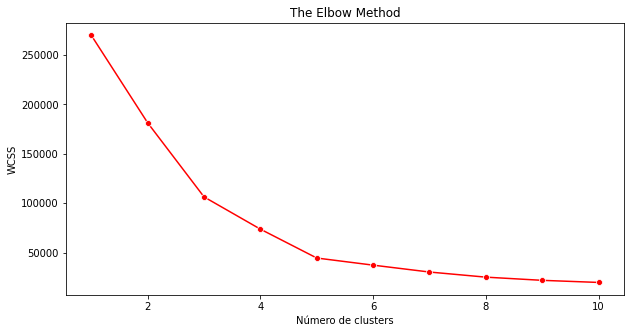

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)


In [ ]:
kmeans1 = kmeans.fit(dados)

In [ ]:
# Coordenadas dos Centróides
centroides = kmeans1.cluster_centers_
centroides

array([[48.26      , 56.48      ],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [87.        , 18.63157895]])

In [ ]:
# Classificação dos dados
classificacao = kmeans1.labels_
classificacao

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [ ]:
dados[3,:]

array([16, 77])

In [ ]:
classificacao[3]

0

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
graf1 = px.scatter(x = dados[:,0], y = dados[:,1], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means')
graf3.update_xaxes(title = 'Rendimento anual (K$)')
graf3.update_yaxes(title = 'Pontuação')
graf3.show()

In [ ]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,2
1,0
2,2
3,0
4,2
...,...
195,1
196,3
197,1
198,3


In [ ]:
df3 = pd.concat([df, agrupamento],axis=1)
df3

,identificacao,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,2
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [ ]:
df3.iloc[150 , :]

identificacao     151
genero           Male
idade              43
rendimento         78
pontuacao          17
Grupo               3
Name: 150, dtype: object

In [ ]:
df3.loc[df3.identificacao == 92] 

,identificacao,genero,idade,rendimento,pontuacao,Grupo
91,92,Male,18,59,41,0


In [ ]:
grupo0 = df3.loc[df3.Grupo == 0]
grupo0 

,identificacao,genero,idade,rendimento,pontuacao,Grupo
1,2,Male,21,15,81,0
3,4,Female,23,16,77,0
5,6,Female,22,17,76,0
7,8,Female,23,18,94,0
9,10,Female,30,19,72,0
...,...,...,...,...,...,...
118,119,Female,51,67,43,0
119,120,Female,50,67,57,0
120,121,Male,27,67,56,0
121,122,Female,38,67,40,0


In [ ]:
grupo0.shape

(100, 6)

In [ ]:
grupo1 = df3.loc[df3.Grupo == 1]
grupo1

,identificacao,genero,idade,rendimento,pontuacao,Grupo
123,124,Male,39,69,91,1
125,126,Female,31,70,77,1
127,128,Male,40,71,95,1
129,130,Male,38,71,75,1
131,132,Male,39,71,75,1
133,134,Female,31,72,71,1
135,136,Female,29,73,88,1
137,138,Male,32,73,73,1
139,140,Female,35,74,72,1
141,142,Male,32,75,93,1


In [ ]:
grupo1.shape

(39, 6)

## **K Means com todos os atributos**

In [ ]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [ ]:
df2_esc.shape

(200, 4)

**Elbow Method**

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df2_esc)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

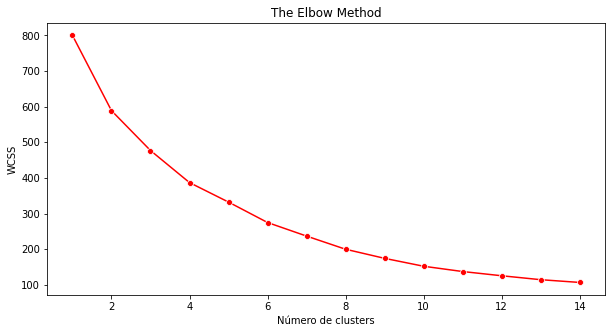

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 15), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [ ]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 5, max_iter = 300)


In [ ]:
kmeans2 = kmeans.fit(df2_esc)

In [ ]:
# Coordenadas dos Centróides
centroides = kmeans2.cluster_centers_
centroides

array([[ 1.12815215,  1.22385356, -0.4498575 , -0.44231533],
       [-0.71852548, -0.46169904,  1.09030974,  1.17305816],
       [-0.88640526,  0.86299444, -0.43455895, -0.40762639],
       [-0.88640526, -0.92608124, -0.70017176,  0.28182355],
       [ 0.25517727,  0.0729628 ,  1.14279271, -1.32381522],
       [ 1.12815215, -0.77111419, -0.08465578,  0.8197479 ]])

In [ ]:
# Inversão do escalonamento
escala.inverse_transform(kmeans2.cluster_centers_)

array([[1.00000000e+00, 5.59032258e+01, 4.87741935e+01, 3.88064516e+01],
       [8.33333333e-02, 3.24166667e+01, 8.91250000e+01, 8.04166667e+01],
       [5.55111512e-17, 5.08750000e+01, 4.91750000e+01, 3.97000000e+01],
       [1.66533454e-16, 2.59459459e+01, 4.22162162e+01, 5.74594595e+01],
       [5.66666667e-01, 3.98666667e+01, 9.05000000e+01, 1.61000000e+01],
       [1.00000000e+00, 2.81052632e+01, 5.83421053e+01, 7.13157895e+01]])

In [ ]:
# Classificação dos dados
classificacao2 = kmeans2.labels_
classificacao2

array([5, 5, 3, 3, 3, 3, 2, 3, 0, 3, 0, 3, 2, 3, 0, 5, 3, 5, 0, 3, 0, 5,
       2, 5, 2, 5, 2, 5, 2, 3, 0, 3, 0, 5, 2, 3, 2, 3, 2, 3, 2, 5, 0, 3,
       2, 3, 2, 3, 3, 3, 2, 5, 3, 0, 2, 0, 2, 0, 3, 0, 0, 5, 2, 2, 0, 5,
       2, 2, 5, 3, 0, 2, 2, 2, 0, 5, 2, 0, 3, 2, 0, 5, 0, 2, 3, 0, 2, 3,
       3, 2, 2, 5, 0, 2, 3, 5, 2, 3, 0, 5, 3, 2, 0, 5, 0, 3, 2, 0, 0, 0,
       0, 3, 2, 5, 3, 3, 2, 2, 2, 2, 5, 2, 1, 5, 3, 1, 0, 5, 0, 5, 4, 5,
       3, 1, 4, 1, 4, 5, 4, 1, 2, 5, 3, 1, 4, 5, 0, 1, 4, 5, 4, 5, 4, 1,
       4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 5, 4, 5, 4, 5, 4, 1,
       4, 5, 4, 5, 4, 1, 4, 1, 4, 5, 4, 5, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [ ]:
classificacao2[199]

1

In [ ]:
agrupamento2 = pd.DataFrame(classificacao2, columns = ['Grupo'])
agrupamento2

,Grupo
0,5
1,5
2,3
3,3
4,3
...,...
195,1
196,4
197,1
198,4


In [ ]:
df4 = pd.concat([df, agrupamento2],axis=1)
df4

,identificacao,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,5
1,2,Male,21,15,81,5
2,3,Female,20,16,6,3
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,4
197,198,Male,32,126,74,1
198,199,Male,32,137,18,4


In [ ]:
df4.iloc[125 , :]

identificacao       126
genero           Female
idade                31
rendimento           70
pontuacao            77
Grupo                 1
Name: 125, dtype: object

In [ ]:
df4.loc[df4.identificacao == 76] 

,identificacao,genero,idade,rendimento,pontuacao,Grupo
75,76,Male,26,54,54,5


In [ ]:
grupo0 = df4.loc[df4.Grupo == 0]
grupo0 

,identificacao,genero,idade,rendimento,pontuacao,Grupo
8,9,Male,64,19,3,0
10,11,Male,67,19,14,0
14,15,Male,37,20,13,0
18,19,Male,52,23,29,0
20,21,Male,35,24,35,0
30,31,Male,60,30,4,0
32,33,Male,53,33,4,0
42,43,Male,48,39,36,0
53,54,Male,59,43,60,0
55,56,Male,47,43,41,0


In [ ]:
grupo0.shape

(31, 6)